<a href="https://colab.research.google.com/github/anil-chhetri/NLP/blob/master/Sentiment_Analysis_with_Scikit_Learn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import re

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [2]:
!cp "/content/gdrive/My Drive/Datasets/database.sqlite" /content/

In [3]:
%reload_ext sql

In [4]:
%sql sqlite:////content/database.sqlite

'Connected: @/content/database.sqlite'

In [5]:
%%sql
select * from sqlite_master

 * sqlite:////content/database.sqlite
Done.


type,name,tbl_name,rootpage,sql
table,Tweets,Tweets,2,"CREATE TABLE Tweets ( tweet_id INTEGER PRIMARY KEY, airline_sentiment TEXT, airline_sentiment_confidence NUMERIC, negativereason TEXT, negativereason_confidence NUMERIC, airline TEXT, airline_sentiment_gold TEXT, name TEXT, negativereason_gold TEXT, retweet_count INTEGER, text TEXT, tweet_coord TEXT, tweet_created TEXT, tweet_location TEXT, user_timezone TEXT)"


In [6]:
%%sql 
select * From Tweets limit 1

 * sqlite:////content/database.sqlite
Done.


tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
567588278875213824,neutral,1,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch,,2015-02-16 23:36:05 -0800,USA,Sydney


In [7]:
df = %sql select * from Tweets

 * sqlite:////content/database.sqlite
Done.


In [8]:
df = df.DataFrame()

In [9]:
df.columns

Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')

In [10]:
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,567588278875213824,neutral,1.0,,,Delta,,JetBlueNews,,0,@JetBlue's new CEO seeks the right balance to ...,,2015-02-16 23:36:05 -0800,USA,Sydney
1,567590027375702016,negative,1.0,Can't Tell,0.6503,Delta,,nesi_1992,,0,@JetBlue is REALLY getting on my nerves !! 😡😡 ...,,2015-02-16 23:43:02 -0800,undecided,Pacific Time (US & Canada)
2,567591480085463040,negative,1.0,Late Flight,0.346,United,,CPoutloud,,0,@united yes. We waited in line for almost an h...,,2015-02-16 23:48:48 -0800,"Washington, DC",
3,567592368451248130,negative,1.0,Late Flight,1,United,,brenduch,,0,@united the we got into the gate at IAH on tim...,,2015-02-16 23:52:20 -0800,,Buenos Aires
4,567594449874587648,negative,1.0,Customer Service Issue,0.3451,Southwest,,VahidESQ,,0,@SouthwestAir its cool that my bags take a bit...,,2015-02-17 00:00:36 -0800,"Los Angeles, CA",Pacific Time (US & Canada)


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14485 entries, 0 to 14484
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14485 non-null  int64  
 1   airline_sentiment             14485 non-null  object 
 2   airline_sentiment_confidence  14485 non-null  float64
 3   negativereason                14485 non-null  object 
 4   negativereason_confidence     14485 non-null  object 
 5   airline                       14485 non-null  object 
 6   airline_sentiment_gold        14485 non-null  object 
 7   name                          14485 non-null  object 
 8   negativereason_gold           14485 non-null  object 
 9   retweet_count                 14485 non-null  int64  
 10  text                          14485 non-null  object 
 11  tweet_coord                   14485 non-null  object 
 12  tweet_created                 14485 non-null  object 
 13  t

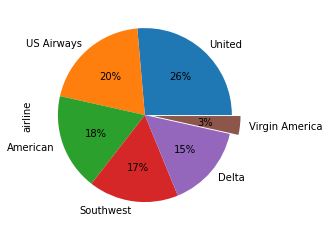

In [12]:
df.airline.value_counts().plot(kind='pie', explode=[0.0,0.0,0.0,0.0,0.0,0.1], autopct='%1.0f%%' )

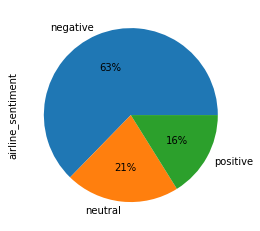

In [13]:
df.airline_sentiment.value_counts().plot.pie(autopct='%.f%%')

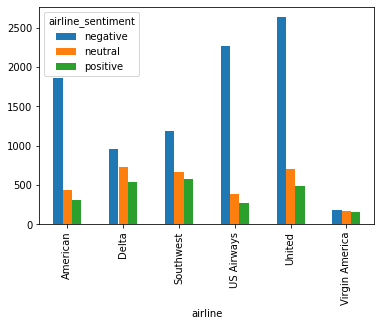

In [14]:
df.groupby(['airline','airline_sentiment']).airline_sentiment.count().unstack().plot.bar()

In [15]:
features = df['text']
target = df['airline_sentiment']

In [23]:
#data cleaning
a = features[0]
a

"@JetBlue's new CEO seeks the right balance to please passengers and Wall ... - Greenfield Daily Reporter http://t.co/LM3opxkxch"

In [24]:
final_text = []

for sentences in range(0,len(features)):
  
  ## remove special character
  clean_text = re.sub(r'\W', ' ', str(features[sentences]))

  ## remove all the sigle character
  clean_text = re.sub(r'\s+[a-z]\s+', ' ', clean_text, flags=re.I)

  ## substitute multiple spaces
  clean_text = re.sub(r'\s+', ' ', clean_text)

  ## Converting to lower case
  clean_text = clean_text.lower()

  final_text.append(clean_text)


In [28]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [42]:
stopwords = set(STOPWORDS)
text = ' '.join(final_text)
cloud = WordCloud(stopwords=stopwords).generate(text)


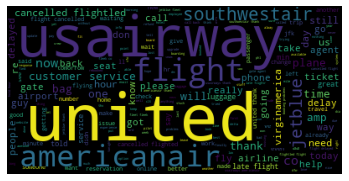

In [43]:
plt.imshow(cloud)
plt.axis('off')
plt.show()

TF-IDF (Term frequency and Inverse Document frequency)

formula: 
  
TF  = (Frequency of a word in the document)/(Total words in the document)

IDF = Log((Total number of docs)/(Number of docs containing the word))

In [45]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords as sw
from sklearn.feature_extraction.text import TfidfVectorizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [46]:
vector = TfidfVectorizer(max_features=2500, min_df=7, max_df=0.8, stop_words=sw.words('english'))
vector_features = vector.fit_transform(final_text).toarray()

In [48]:
vector_features.shape

(14485, 2280)

In [49]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(vector_features, target, test_size=0.2, random_state=0)

In [50]:
from sklearn.ensemble import RandomForestClassifier

In [51]:
text_clf = RandomForestClassifier(n_estimators=200, random_state=0)
text_clf.fit(xtrain, ytrain)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [55]:
print(classification_report(ytest, text_clf.predict(xtest)))

              precision    recall  f1-score   support

    negative       0.78      0.93      0.85      1831
     neutral       0.63      0.38      0.47       609
    positive       0.73      0.58      0.64       457

    accuracy                           0.76      2897
   macro avg       0.72      0.63      0.66      2897
weighted avg       0.74      0.76      0.74      2897



In [56]:
confusion_matrix(ytest, text_clf.predict(xtest))

array([[1702,   78,   51],
       [ 333,  231,   45],
       [ 139,   55,  263]])

In [60]:
accuracy_score(ytest, text_clf.predict(xtest))

0.7580255436658613